In [2]:
#get the data from the cleaned data file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../data/cleaned_data_pokemon.csv')
data.head()

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


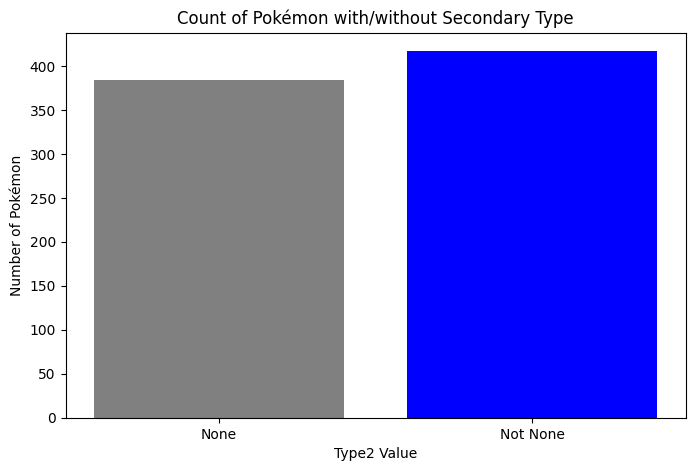

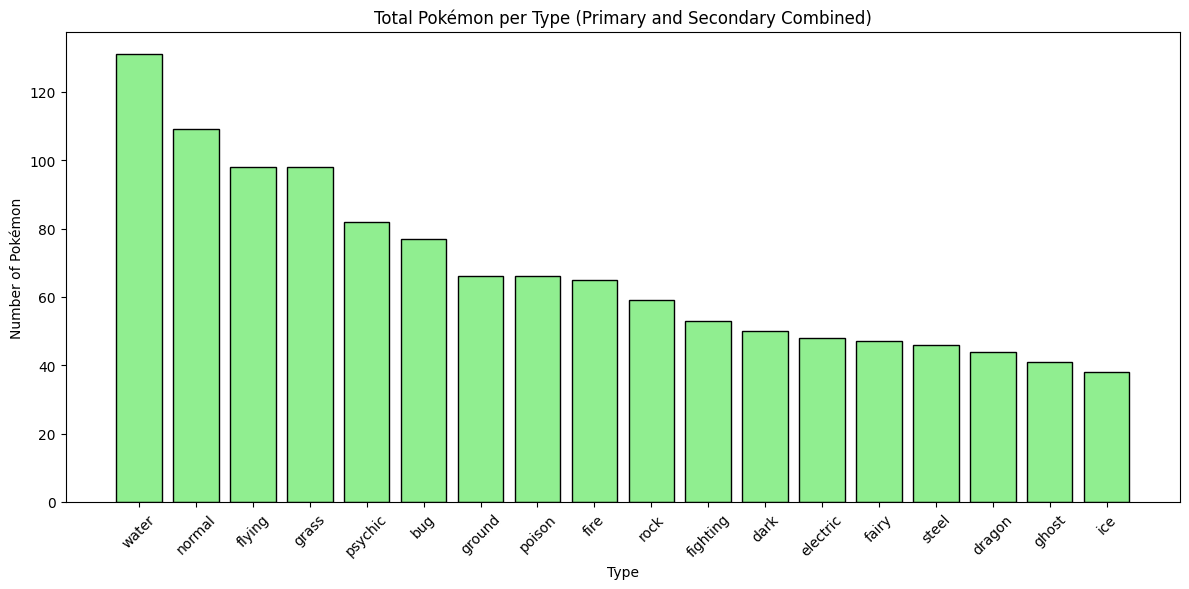

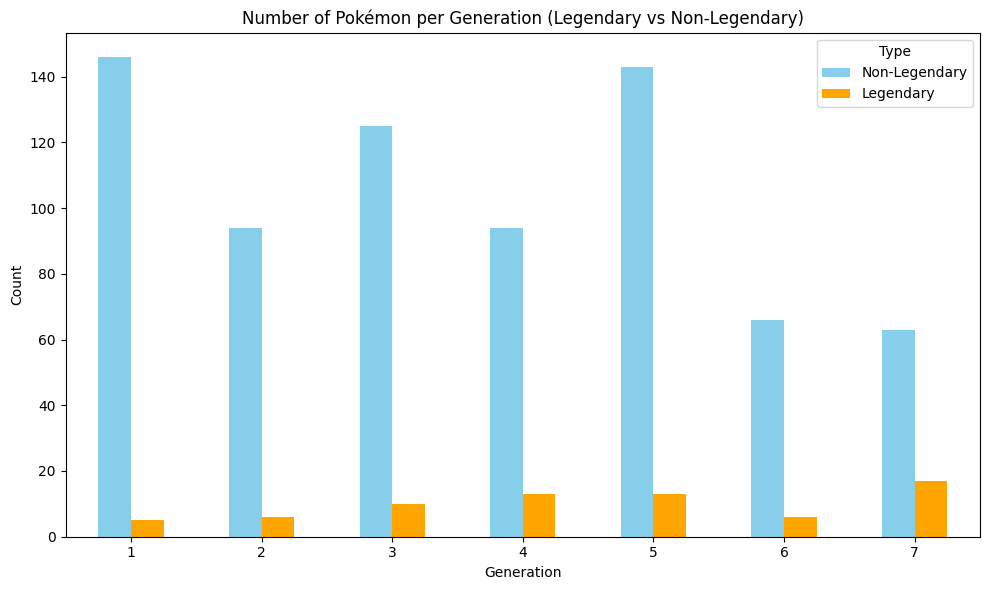

In [9]:
#First section will be general overall information, amount per gen, amount per type, etc

none_count = data['type2'].isna().sum()
not_none_count = data['type2'].notna().sum()
summary = pd.DataFrame({
    'Type2 Category': ['None', 'Not None'],
    'Count': [none_count, not_none_count]
})

plt.figure(figsize=(8, 5))
plt.bar(summary['Type2 Category'], summary['Count'], color=['gray', 'blue'])
plt.title('Count of Pokémon with/without Secondary Type')
plt.xlabel('Type2 Value')
plt.ylabel('Number of Pokémon')
plt.show()

all_types = pd.concat([data['type1'], data['type2']]).dropna()

type_counts = all_types.value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(type_counts.index, type_counts.values, color='lightgreen', edgecolor='black')
plt.title('Total Pokémon per Type (Primary and Secondary Combined)')
plt.xlabel('Type')
plt.ylabel('Number of Pokémon')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

legendary = data.groupby(['is_legendary','generation']).agg(
    count_per_gen = ('is_legendary','count')
)

legendary_unstacked = legendary.unstack(level=0)
legendary_unstacked.columns = ['Non-Legendary', 'Legendary']

legendary_unstacked.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Number of Pokémon per Generation (Legendary vs Non-Legendary)')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Type')
plt.tight_layout()
plt.show()




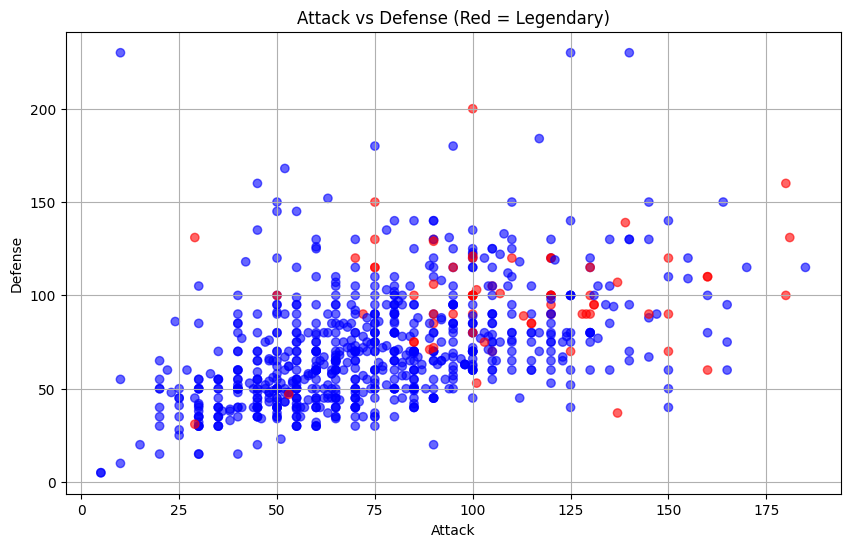

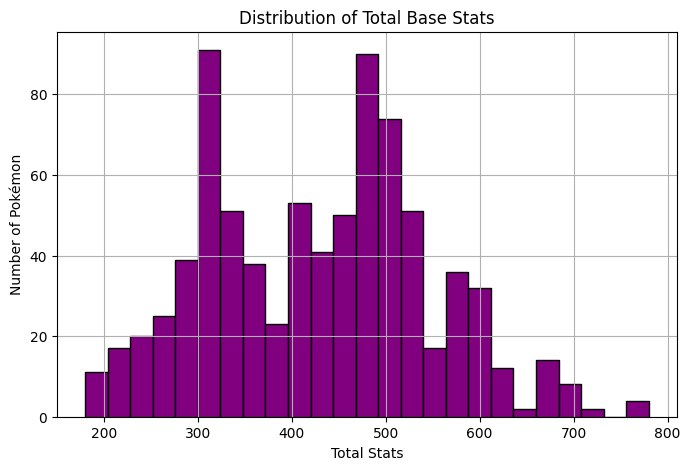

In [ ]:
plt.figure(figsize=(10, 6))
colors = data['is_legendary'].map({0: 'blue', 1: 'red'})
plt.scatter(data['attack'], data['defense'], c=colors, alpha=0.6, label='Pokémon')

#How do Legendary Pokémon differ from regular ones in stat distribution (e.g., Attack vs Defense)?
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs Defense (Red = Legendary)')
plt.grid(True)
plt.show()


#What is the frequency distribution of total base stats?
plt.figure(figsize=(8, 5))
plt.hist(data['base_total'], bins=25, color='purple', edgecolor='black')
plt.title('Distribution of Total Base Stats')
plt.xlabel('Total Stats')
plt.ylabel('Number of Pokémon')
plt.grid(True)
plt.show()

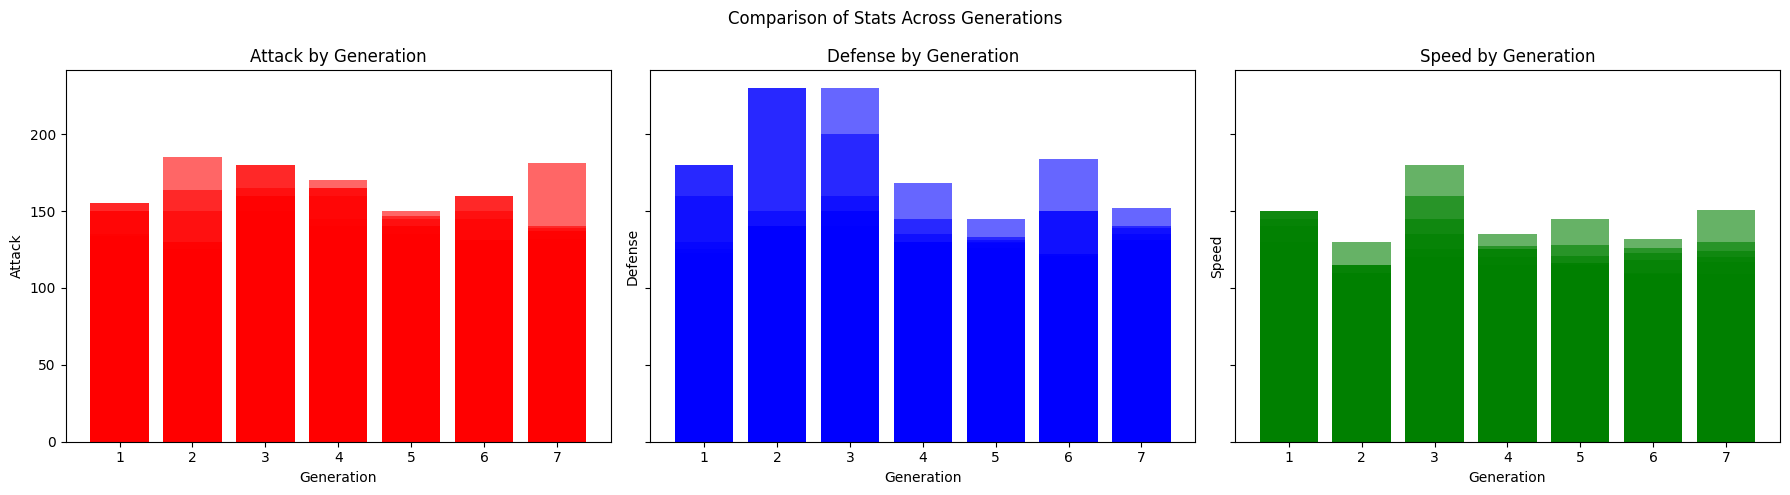

In [ ]:

#How do Attack, Defense, and Speed compare across generations?
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

stats = ['attack', 'defense', 'speed']
colors = ['red', 'blue', 'green']

for i, stat in enumerate(stats):
    axs[i].bar(data['generation'], data[stat], color=colors[i], alpha=0.6)
    axs[i].set_title(f'{stat.capitalize()} by Generation')
    axs[i].set_xlabel('Generation')
    axs[i].set_ylabel(stat.capitalize())

plt.suptitle('Comparison of Stats Across Generations')
plt.tight_layout()
plt.show()

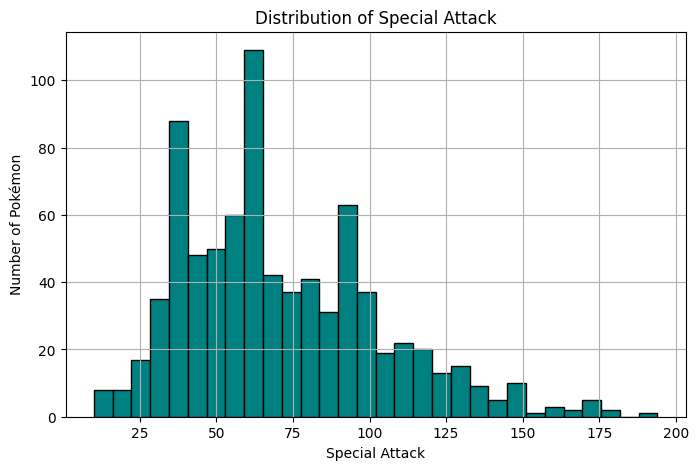

In [ ]:
#Does the distribution of Special Attack suggest multiple modes (e.g., weak and strong groups)?

plt.figure(figsize=(8, 5))
plt.hist(data['sp_attack'], bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Special Attack')
plt.xlabel('Special Attack')
plt.ylabel('Number of Pokémon')
plt.grid(True)
plt.show()